# 衡量回归算法标准

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 波士顿房产数据

In [150]:
boston = datasets.load_boston()

In [151]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [152]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [153]:
x = boston.data[:,5] # 只是用房间数量这个特征

In [154]:
x.shape

(506,)

In [155]:
y = boston.target

In [156]:
y.shape

(506,)

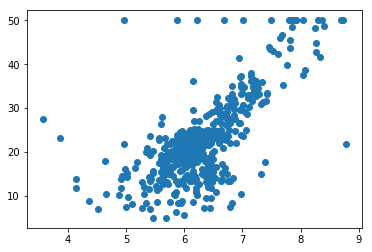

In [157]:
plt.scatter(x, y)

In [158]:
np.max(y)

50.0

最大值为50.0 说明有最大限制，因此只保留小于50.0的数据

In [159]:
x = x[y < 50.0]
y = y[y < 50.0]

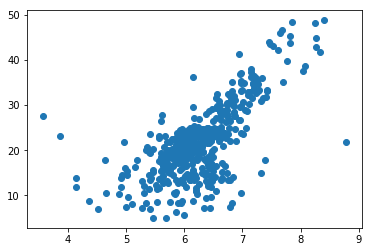

In [160]:
plt.scatter(x, y)

# 使用简单线性回归法

In [161]:
%run C:\Learning\jupyter-notebook\ml\playML\model_selection.py

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [163]:
x_train.shape

(392,)

In [164]:
x_test.shape

(98,)

In [165]:
%run C:\Learning\jupyter-notebook\ml\playML\SimpleLinearRegression.py

In [166]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [167]:
reg.a_

7.8608543562689555

In [168]:
reg.b_

-27.459342806705543

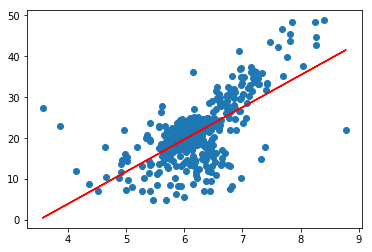

In [169]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color="r")

In [170]:
y_predict = reg.predict(x_test)

# MSE

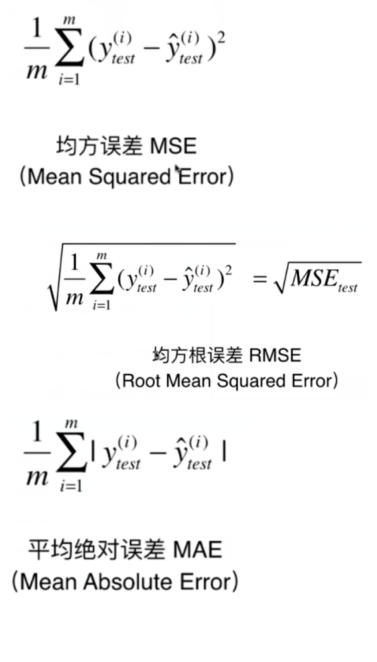

In [171]:
from IPython.display import Image
Image(filename=r"image/x7.png")

In [172]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)

In [173]:
mse_test

24.156602134387438

# RMSE

In [174]:
from math import sqrt
rmse_test = sqrt(mse_test)

In [175]:
rmse_test

4.914936635846635

# MAE

In [176]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)

In [177]:
mae_test

3.5430974409463873

封装在函数中

In [178]:
%run C:\Learning\jupyter-notebook\ml\playML\metrics.py

In [179]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [180]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [181]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

# sklearn中的MSE和MAE

In [182]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [183]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [184]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

# R Square

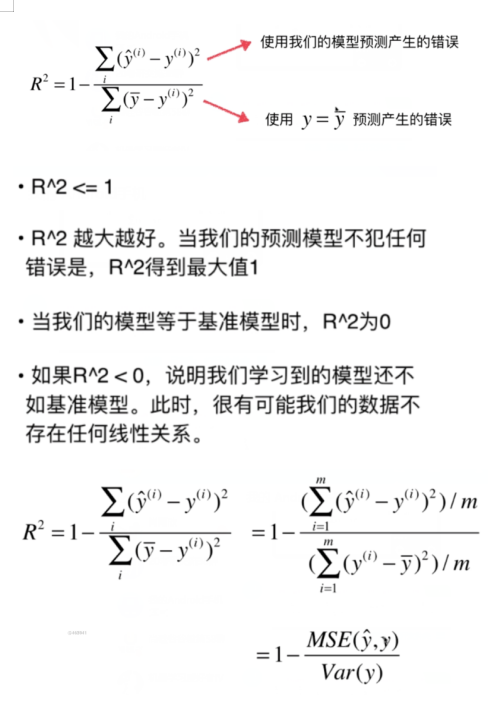

In [185]:
from IPython.display import Image
Image(filename=r"image/x8.png")

In [186]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937322